### **EDA: análisis anivariante**

Este notebook implementa **el análisis univariante del EDA** sobre los tres datasets limpios del proyecto. El objetivo es comprender la distribución y características de cada variable de forma individual antes de pasar a los análisis bivariante y multivariante.

#### **Datasets de EDA**

1. Cost of Living: `cost-of-living-variables-agregadas.csv` 
2. Circleloop: `digital-nomad-index-cicleloop-clean.csv`
3. Movingto: `digital-nomad-index-movingto-clean.csv`

#### **Pasos a seguir**

1. **Importar librerías y cargar los tres datasets procedentes del ETL**.
2. **Análisis univariante Cost of Living**.
3. **Análisis univariante Circleloop**.
4. **Análisis univariante Movingto**.
5. **Conclusiones que podemos extraer**. 

### **1. Cargamos las librerías y los datasets limpios procedentes del ETL**

In [2]:
# Cargamos las librerías que vamos a necesitar

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.mode.copy_on_write = True

# Configuración de las visualizaciones del análisis univariante:
# 1. Estilos de Matplotlib y Seaborn
# 2. Paleta estándar viridis

plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("viridis")


# Cargamos todos los datasets totalmente limpios del proceso de ETL

df_cost = pd.read_csv("./data/variables-agregadas-cost-of-living.csv")
df_circleloop = pd.read_csv("./data/digital-nomad-index-cicleloop-clean.csv")
df_movingto = pd.read_csv("./data/digital-nomad-index-movingto-clean.csv")

# Cargamos los datasets para saber si todo está correcto

df_cost.head(10) # Selección de variables originales y agregadas de Cost of Living

,city_name,country_name,meal_inexpensive_restaurant,meal_midrange_restaurant_2p,mcmeal_fastfood,beer_domestic_restaurant_0_5l,beer_imported_restaurant_0_33l,cappuccino_restaurant,soda_restaurant_0_33l,water_restaurant_0_33l,...,avg_net_salary,mortgage_interest_rate_20y,data_quality_flag,continent,nomad_housing_cost,basic_basket_index,daily_meal_cost,monthly_nomad_cost,local_purchasing_power,housing_salary_ratio
0,Seoul,South Korea,7.68,53.78,6.15,3.07,4.99,3.93,1.48,0.79,...,2689.62,3.47,1,Asia,650.030,4.631667,11.61,1209.990,2.222845,24.168098
1,Shanghai,China,5.69,39.86,5.69,1.14,4.27,3.98,0.53,0.33,...,1419.87,5.03,1,Asia,830.905,1.995000,9.67,1147.345,1.237527,58.519794
2,Guangzhou,China,4.13,28.47,4.98,0.85,1.71,3.54,0.44,0.33,...,1211.68,5.19,1,Asia,425.365,1.572500,7.67,692.370,1.750047,35.105391
3,Mumbai,India,3.68,18.42,3.68,2.46,4.30,2.48,0.48,0.19,...,640.81,7.96,1,Asia,408.225,1.078333,6.16,590.785,1.084675,63.704530
4,Delhi,India,4.91,22.11,4.30,1.84,3.68,1.77,0.49,0.19,...,586.46,8.06,1,Asia,182.575,1.047500,6.68,391.890,1.496491,31.131705
5,Dhaka,Bangladesh,1.95,11.71,4.88,5.85,5.12,1.95,0.29,0.16,...,280.73,9.26,1,Asia,114.940,1.193333,3.90,286.730,0.979074,40.943255
6,Osaka,Japan,7.45,48.39,5.36,3.35,3.72,3.28,1.09,0.81,...,2322.46,1.49,1,Asia,525.550,3.302500,10.73,1035.305,2.243262,22.629023
7,Jakarta,Indonesia,2.59,22.69,3.57,2.06,3.24,2.23,0.61,0.27,...,509.12,9.05,1,Asia,391.510,1.765000,4.82,643.550,0.791112,76.899356
8,Shenzhen,China,4.27,28.47,4.98,1.14,3.99,4.20,0.47,0.34,...,1572.22,4.99,1,Asia,586.910,1.829167,8.47,890.265,1.766013,37.330017
9,Kinshasa,Congo,15.11,42.63,10.08,1.74,2.50,4.35,2.78,0.84,...,400.00,19.33,0,Africa,1362.500,4.215000,19.46,2664.840,0.150103,340.625000


In [3]:
df_circleloop.head(10) # Dataset de Nomad Index de Circleloop

,rank,country,broadband_speed_mbps,mobile_speed_mbps,broadband_cost,monthly_rent,happiness_index,migrant_population_pct,remote_jobs_searches,digital_nomad_score
0,1,Canada,149.35,84.54,43.77,1111.50,7.23,21.3,83900,74.35
1,2,UK,76.49,41.72,44.83,1084.59,7.17,14.1,68400,63.43
2,3,Romania,188.55,41.48,10.23,380.25,6.12,2.4,10980,62.28
3,4,Sweden,158.73,56.64,49.72,1035.45,7.35,20.0,3490,61.54
4,5,Denmark,179.81,66.68,60.55,1239.03,7.65,12.5,1080,61.49
5,6,France,177.93,50.45,34.91,886.86,6.66,12.8,5360,60.80
6,7,Netherlands,125.82,88.13,53.27,1419.21,7.45,13.4,3440,60.27
7,8,Australia,58.52,88.35,60.71,1343.16,7.22,30.0,17600,60.16
8,9,Switzerland,186.40,73.85,90.52,1807.65,7.56,29.9,3840,60.15
9,10,Germany,120.13,49.67,36.09,964.08,7.08,15.7,12720,60.00


In [4]:
df_movingto.head(10) # Dataset de Nomad Index de Circleloop

,rank,country,overall_score,internet_speed,cost_of_living,safety,visa_ease,quality_of_life,taxes,tax_free_period
0,1,Portugal,92,90,85,95,95,95,NHR 20%,10 years
1,2,Estonia,91,95,75,90,98,92,0-20%,183 days/year
2,3,Georgia,90,85,88,82,100,80,1%,183 days/year
3,4,Spain,89,88,80,92,92,94,24%,183 days/year
4,5,Thailand,88,85,95,80,90,88,0-35%,183 days/year
5,6,Mexico,87,82,90,75,94,86,1.92-35%,183 days/year
6,7,Czech Republic,86,87,78,88,85,90,15%,183 days/year
7,8,Malaysia,85,80,92,85,90,85,0-30%,182 days/year
8,9,Croatia,84,84,76,88,88,89,24%,1 year
9,10,Costa Rica,83,79,85,80,90,88,0-25%,183 days/year


### **2. Análisis univariante: Cost of Living**

#### **2.1 Variables categóricas**

Analizamos la distribución de ciudades por país y continente: 

1. Cost of Living es el dataset con mayor volumen de datos: 4.743 ciudades en total. 
2. Ver el volumen de ciudades por continente y por países nos sitúan a nivel general.   

Distribución de ciudades por continente:
----------------------------------------
continent
Europe           1730
North America    1338
Asia              961
Africa            311
South America     305
Oceania            97
Name: count, dtype: int64

Total: 4,742 ciudades


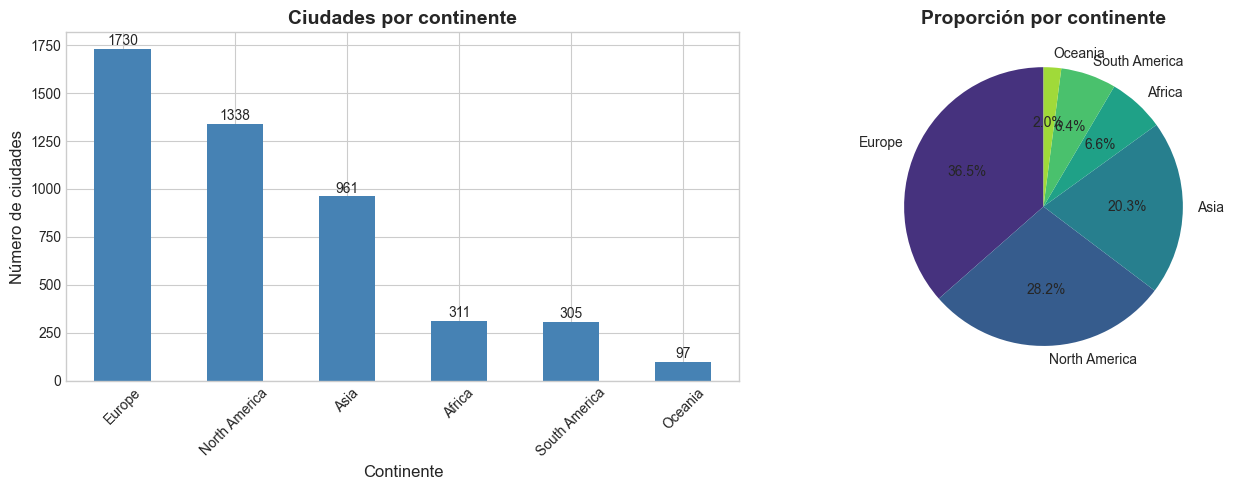

Top 10 de países con más ciudades:
----------------------------------
country_name
United States     1027
Italy              170
India              165
Brazil             157
United Kingdom     155
Germany            144
Russia             129
Canada             117
France              99
China               99
Name: count, dtype: int64


In [14]:
# Distribución por continente

print("Distribución de ciudades por continente:")
print("----------------------------------------")
continent_counts = df_cost['continent'].value_counts()
print(continent_counts)
print(f"\nTotal: {continent_counts.sum():,} ciudades")

# Montamos la matriz para los dos gráficos. En este caso: 
# 1. Gráfico de barras con número de ciudades por continente
# 2. Gráfico de tarta con el porcentaje de reparto de volumen de ciudades por continente

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# 1. Gráfico de barras con ciudades por continente

ax1 = axes[0]
continent_counts.plot(kind='bar', ax=ax1, color='steelblue')
ax1.set_title('Ciudades por continente', fontsize=14, fontweight='bold')
ax1.set_xlabel('Continente', fontsize=12)
ax1.set_ylabel('Número de ciudades', fontsize=12)
ax1.tick_params(axis='x', rotation=45)


for i, v in enumerate(continent_counts): # Añadimos valores sobre las barras
    ax1.text(i, v + 20, str(v), ha='center', fontsize=10)

# Gráfico de tarta con el porcentaje de reparto entre continente 

ax2 = axes[1]
continent_counts.plot(kind='pie', ax=ax2, autopct='%1.1f%%', startangle=90)
ax2.set_title('Proporción por continente', fontsize=14, fontweight='bold')
ax2.set_ylabel('')

plt.tight_layout()
plt.show()

# Resumen de volumen de ciudades por países

print("Top 10 de países con más ciudades:")
print("----------------------------------")
country_counts = df_cost['country_name'].value_counts().head(10)
print(country_counts)


#### **2.2 Variables numéricas originales del dataset Cost of Living**

1. Analizamos variables oroginales que son relevante para un nómada digital: vivienda, alimentación, transporte y salarios.
2. Mostramos distribuciones con histogramas y valores atípicos con diagramas de caja.  

In [28]:
# Creamos una lista de las variables originales principales de Cost of Living

vars_list = ['rent_1br_city_center', 'rent_1br_outside_center',
                'meal_inexpensive_restaurant', 'cappuccino_restaurant',
                'public_transport_monthly_pass', 'gasoline_1l',
                'avg_net_salary', 'utilities_85sqm',
                'internet_60mbps_unlimited']

# Pintamos los valores estadísticos descriptivos de cada una de las variables originales más relevantes: 
# Son relevantes dentro del plan de vida de un nómada digital: 
# 1. Alquiler de vivienda: 'rent_1br_city_center', 'rent_1br_outside_center'
# 2. Cesta de la compra: 'meal_inexpensive_restaurant', 'cappuccino_restaurant'
# 3. Ttransporte: 'public_transport_monthly_pass', 'gasoline_1l'
# 4. Salario y gastos: 'avg_net_salary', 'utilities_85sqm'
# 5. Conectividad a internet: 'internet_60mbps_unlimited'

print("Valores estadísticos descriptivos de las variables originales de Cost of Living:")
print("--------------------------------------------------------------------------------")
df_cost[vars_list].describe().round(2)

Valores estadísticos descriptivos de las variables originales de Cost of Living:
--------------------------------------------------------------------------------


,rent_1br_city_center,rent_1br_outside_center,meal_inexpensive_restaurant,cappuccino_restaurant,public_transport_monthly_pass,gasoline_1l,avg_net_salary,utilities_85sqm,internet_60mbps_unlimited
count,4742.00,4742.00,4742.00,4742.00,4742.00,4742.00,4742.00,4742.00,4742.00
mean,707.64,565.72,10.39,2.74,40.79,1.36,1870.48,135.04,143.33
std,620.69,505.84,7.02,1.35,31.45,0.49,1600.99,86.77,7056.95
min,21.70,12.20,0.45,0.22,0.00,0.03,18.00,6.07,1.36
25%,258.98,177.94,4.48,1.58,17.79,1.10,456.00,67.77,18.97
50%,526.87,410.96,10.00,2.62,36.88,1.26,1369.87,127.90,34.41
75%,1048.31,850.00,15.00,3.75,50.00,1.71,3075.00,182.40,57.85
max,12608.83,8989.37,57.14,10.00,369.86,3.70,12821.40,1066.67,485991.77


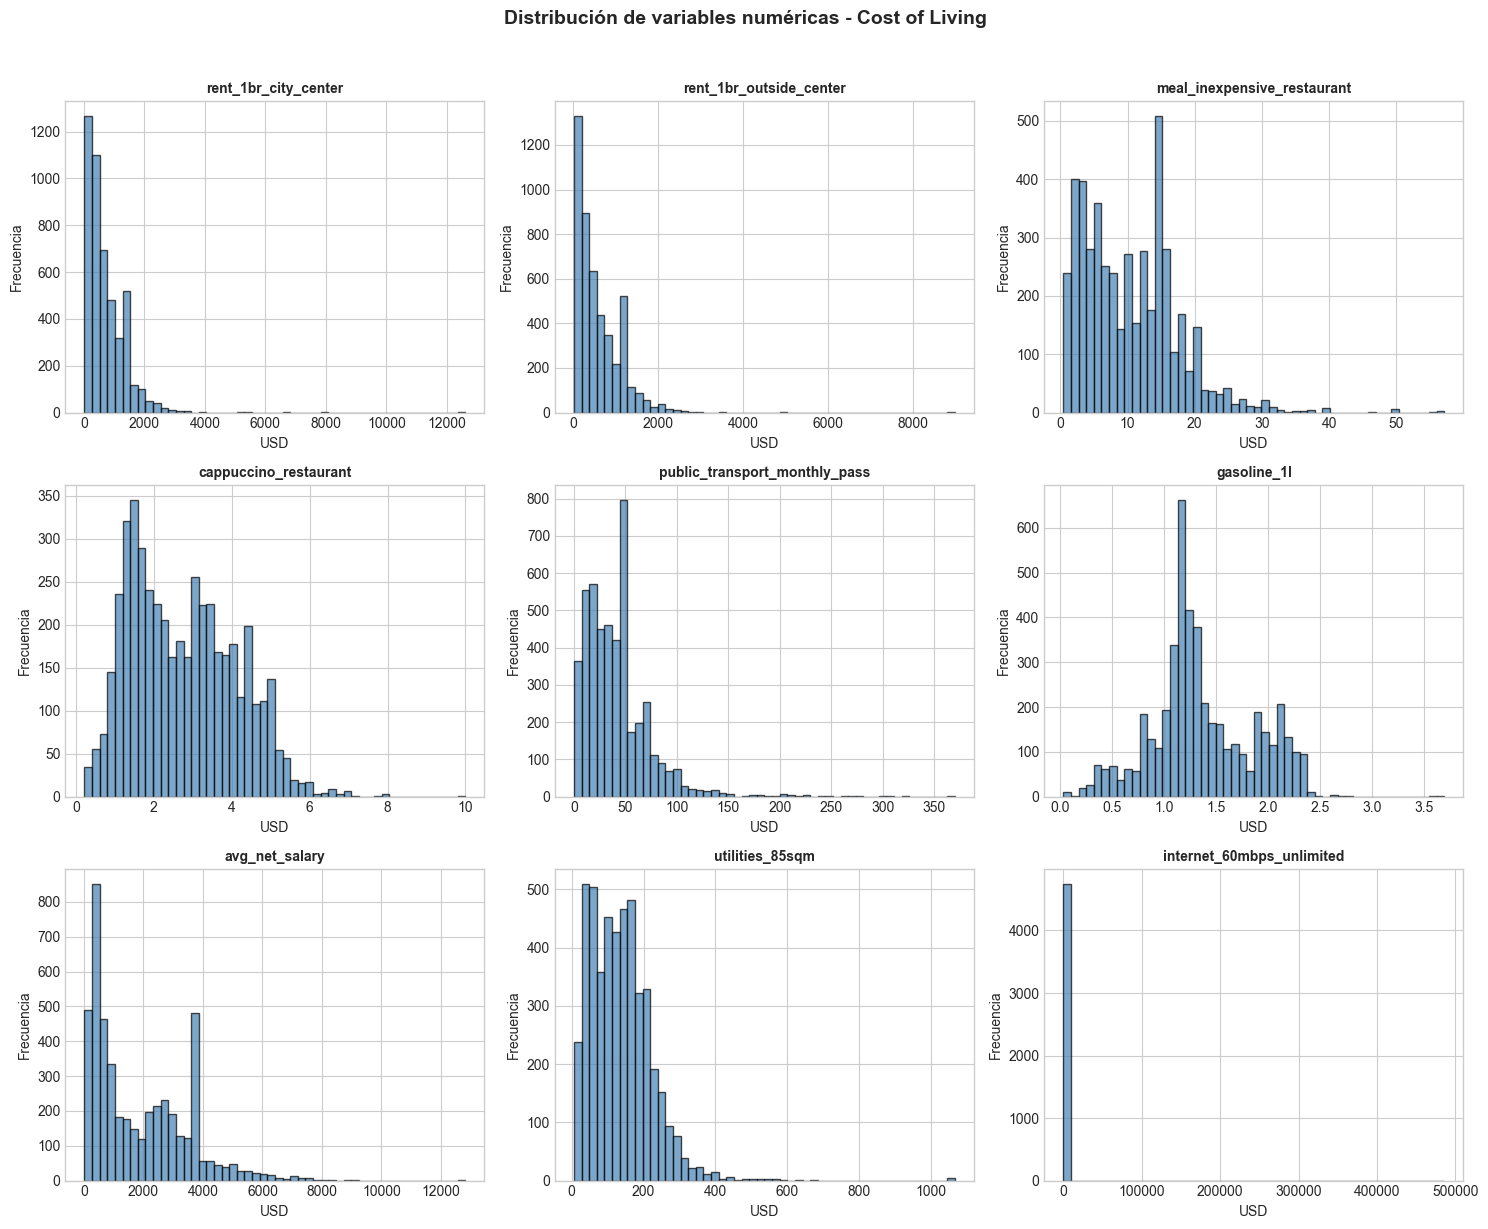

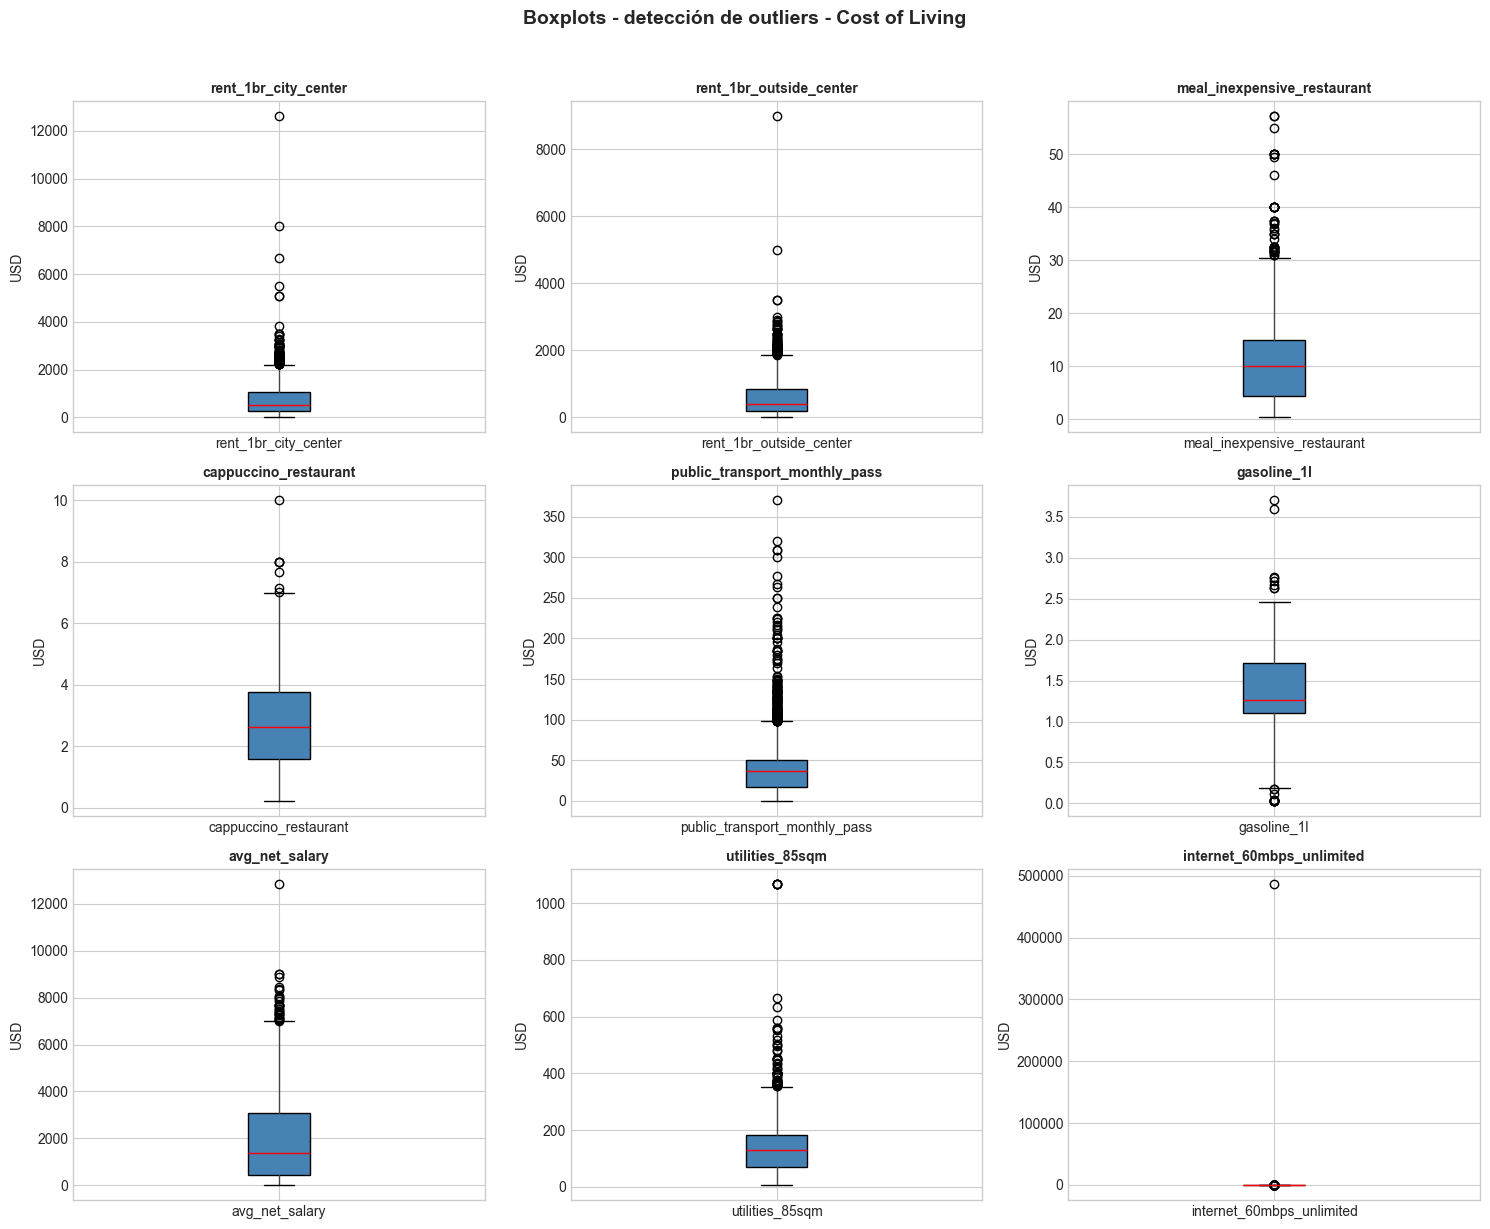

In [31]:
# Visualizaciones: distribuciones con histogramas y outliers con diagramas de caja

# Histogramas para ver la distribución de toda la lista de variables clave 

fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.flatten()

for i, var in enumerate(vars_list):
    ax = axes[i]
    df_cost[var].hist(bins=50, ax=ax, color='steelblue', edgecolor='black', alpha=0.7)
    ax.set_title(var, fontsize=10, fontweight='bold')
    ax.set_xlabel('USD')
    ax.set_ylabel('Frecuencia')

plt.suptitle('Distribución de variables numéricas - Cost of Living', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

# Mostramos los diagramas de caja para ver outliers en las mismas variables 

fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.flatten()

for i, var in enumerate(vars_list):
    ax = axes[i]
    df_cost.boxplot(column=var, ax=ax,
                    patch_artist=True, 
                    boxprops=dict(facecolor='steelblue', color='black'),
                    medianprops=dict(color='red'))
    ax.set_title(var, fontsize=10, fontweight='bold')
    ax.set_ylabel('USD')

plt.suptitle('Boxplots - detección de outliers - Cost of Living', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()